# 1. Redução das das amostras 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor

import sklearn
import random

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

In [3]:
def clean_data(data):
    #data = read_instance(data)
    #retirando a coluna de nomes, local de embarque, tarifa do passageiro, 
    #numero do ticket 
    data = data.drop(columns=['Name'])
    data = data.drop(columns=['Ticket'])
    data = data.drop(columns=['Fare'])
    data = data.drop(columns=['Embarked'])
    # escolher se tirar cabine ou não pois a cabine infere no setor do barco
    data = data.drop(columns=['Cabin'])
    data = data.dropna()
    #trocando valores de male e female por 1 e 0
    data.loc[data.Sex=='male','Sex'] = 1
    data.loc[data.Sex=='female','Sex'] = 0
    return data

In [4]:
data = read_instance('train.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


% de mulheres sobreviventes: 0.7420382165605095
% de mulheres sobreviventes: 0.18890814558058924


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

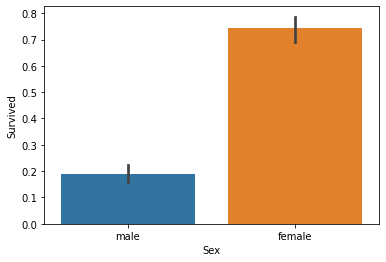

In [6]:
#quem tem mais chance de soobrevivencia?
mulher = data.loc[data.Sex == 'female']["Survived"]
m_sobrevivente = sum(mulher)/len(mulher)

print("% de mulheres sobreviventes:", m_sobrevivente )

homem = data.loc[data.Sex == 'male']["Survived"]
h_sobrevivente = sum(homem)/len(homem)

print("% de mulheres sobreviventes:", h_sobrevivente )

sns.barplot(x="Sex", y="Survived", data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

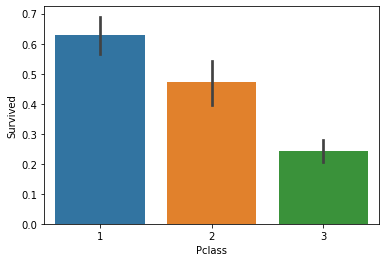

In [7]:
sns.barplot(x="Pclass", y="Survived", data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

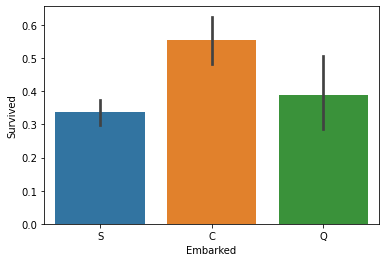

In [8]:
sns.barplot(x="Embarked", y="Survived", data=data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

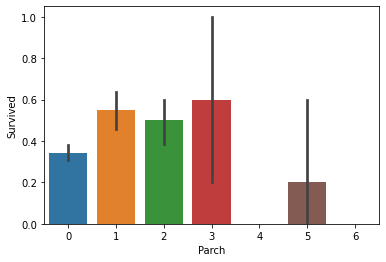

In [9]:
sns.barplot(x="Parch", y="Survived", data=data)

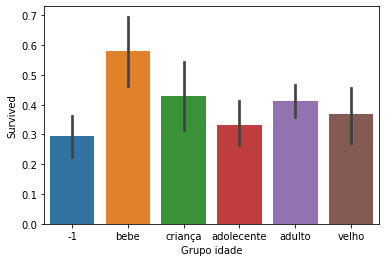

In [10]:
data["Age"] = data["Age"].fillna(-0.5)
bins = [-1, 0, 12, 18, 25, 45, np.inf]
labels = ['-1', 'bebe', 'criança', 'adolecente', 'adulto', 'velho']
data['Grupo idade'] = pd.cut(data["Age"], bins, labels = labels)

sns.barplot(x="Grupo idade", y="Survived", data=data)
plt.show()

In [11]:
data = clean_data(data)

In [12]:
data = data.drop(columns=['Grupo idade'])

In [13]:
display(data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,-0.5,1,2
889,890,1,1,1,26.0,0,0


In [14]:
data_test = read_instance('test.csv')
data_test = clean_data(data_test)
display(data_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1
411,1303,1,0,37.0,1,0
412,1304,3,0,28.0,0,0
414,1306,1,0,39.0,0,0


# Treino

In [15]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,-0.5,1,2
889,890,1,1,1,26.0,0,0


In [16]:
x,y = data.drop(columns=['Survived']), data['Survived']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [22]:
model = MLPClassifier(activation='logistic', max_iter=10000,solver ='adam',hidden_layer_sizes = (100))
model.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=10000)

In [23]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       169
           1       0.91      0.51      0.65        99

    accuracy                           0.80       268
   macro avg       0.84      0.74      0.75       268
weighted avg       0.82      0.80      0.78       268

